# Ising model
> a mathematical model for phase transitions


## About

This blog is about the Ising model. The Ising model plays a central role in the theory of phase transitions. It is a mathematical model of ferromagnetism (for example, iron can be magnetized in a magnetic field, but if heated, it loses magnetization beyond Curie temperature).

The Ising model is named after Ernst Ising, Ph.D. in Physics (1924) from the University of Hamburg under the supervision of Wilhelm Lenz. Ising solved the one-dimensional (1D) Ising model exactly to find no phase transition. He also provided arguments on why there would not be a phase transition in higher dimensions either. In 1936, Peierls argued that both 2D and 3D Ising models admit phase transitions.

The Ising Hamiltonian can be written as,

$$
{H} = -J \sum_{\langle i j \rangle} \sigma_{i} \sigma_{j}.  
$$

* The spins $\sigma_{i}$ can take values $\pm 1$,
*  $\langle i j \rangle$ implies nearest-neighbor interaction only,
* $J>0$ is the strength of exchange interaction.


In this notebook, we study the Bragg-Williams mean field theory of Ising Model.

In [1]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
#plt.rcParams.update({ "text.usetex": True,    "font.family": "Times New Roman"})

## Bragg-Williams mean field theory of Ising Model

The order parameter is:

$$
m =\langle\sigma \rangle= \frac{\sum_i \sigma_i}{N} =\frac{N_{\uparrow} - N_{\downarrow}}{N}  
$$

We now consider the mean-field approximation where each spin is replaced by its average value. The energy of the system is then:

$$
U(m) \simeq -J \sum_{\langle ij \rangle} \langle \sigma_{i} \rangle \langle \sigma_{j} \rangle   = -\frac{NqJ}{2} m^{2}
$$

Here $q=2d$ is coordination number and depends on the dimensionality $d$.

The entropy is:

$$
S(m) =  k_B \ln \binom{N}{N_{\uparrow}} =  k_B \ln \frac{N!}{N_\uparrow !\,\,N_\downarrow !} = k_B \ln \frac{N!}{N_\uparrow !\,\,(N-N_\uparrow) !}
$$

Note that

$$
N_\uparrow = \frac{N\left(1+m\right)}2,\qquad N_\downarrow = \frac{N\left(1-m\right)}2
$$

Thus, the entropy is:

$$
S(m) =  k_B \ln \binom{N}{N_{\uparrow}} =  k_B \ln  \frac{N!}{\big[\frac{N}2(1-m)\big]!\,\,\big[\tfrac{N}2 (1+m)\big]!}  
$$


In the following, we use the Stirling's approximation, $\ln N! \approx N\ln N - N$. The approximation can be derived as:

$$
\log \left[N!\right]= \sum_{k=1}^N \log k \approx \int_1^N \log k = N\log N-N+1
$$

## Free energy in the Bragg-Williams mean field theory

Using the Stirling's approximation, the entropy is:

$$
S= -\frac{N k_B}{2}\left[-2\ln2+ \left({1+m}\right) \ln \left( {1+m}\right)  + \left({1-m} \right) \ln  \left({1-m}\right)    \right]
$$

Doing a Taylor expansion, and using

$$
\ln(1+x) = x - \frac{x^2}{2} + \frac{x^3}{3} + \dots \qquad (|x|<1),
$$

$$
\ln(1-x) =- x - \frac{x^2}{2} - \frac{x^3}{3} - \dots \qquad (|x|<1)
$$


We find that:

$$
\frac{S}{Nk_B} = \ln2 -\frac12 m^2 -\frac1{12}m^4-\dots
$$

The free energy per particle is

$$
f(T,m) = \frac{U - TS}N   =
	   \frac{k_B}2 \left(T-T_c\right) m^2+ \frac{k_B}{12} Tm^4 - k_B T\ln2 + \dots
$$

Here $T_c=\frac{qJ}{k_B}$.

We can write the above free energy as:

$$
f(T,m) =  \frac12 a\,m^2 + \frac14 b m^4 - k_B T\ln2 + \dots
$$

In the following, we plot the free energy for temperature above and below $T_c$.

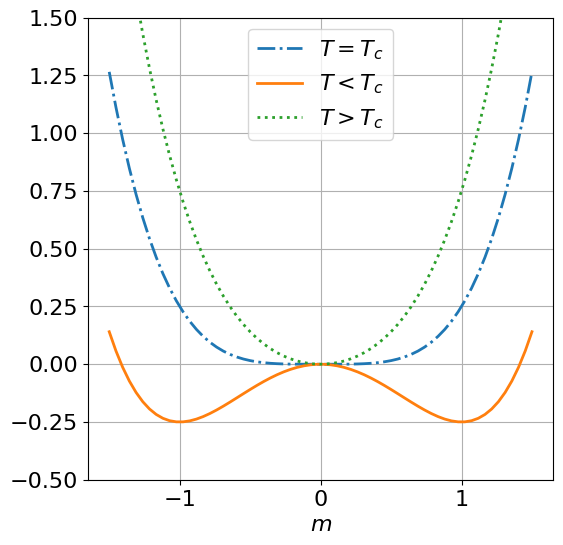

In [2]:
fig = plt.figure(num=None, figsize=(6, 6), dpi=100, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16}); plt.grid()

def freeEnergy(a, b, m):
    return 0.5*a*m**2 + 0.25*b*m**4

Nt=64
m = np.linspace(-1.5, 1.5, Nt)
b = 1

a = 0;  plt.plot(m, freeEnergy(a, b, m), '-.', lw=2, label='$T=T_c$')
a = -1;  plt.plot(m, freeEnergy(a, b, m), '-', lw=2, label='$T<T_c$')
a = 1;  plt.plot(m, freeEnergy(a, b, m), ':', lw=2, label='$T>T_c$')
plt.xlabel(r'$m$'); plt.ylim(-0.5, 1.5)
plt.legend();

#### Minimizing the free energy

Minimising the free energy with respect to $m$, we get

$$
am + bm^3=0
$$

Thus, the solutions are:

$$
m=\pm\sqrt{\frac{-a}b},\qquad m=0
$$

The critical exponent is:

$$
m\propto (T_c-T)^{0.5}
$$

## Plotting the mean field solution


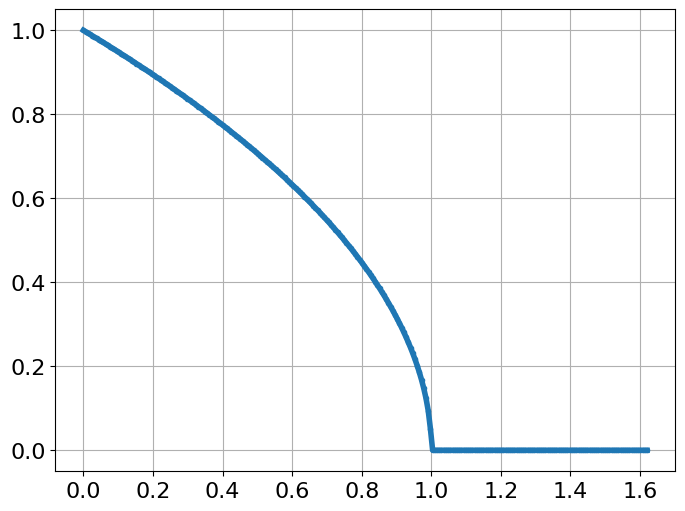

In [3]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16}); plt.grid()

def orderParameter(T, Tc):
    N = np.size(T); m=np.zeros(N)
    for i in range(N):
        if T[i]<=Tc:   m[i] = (Tc-T[i])**0.5
        else:         m[i] = 0
    return m


Nt=256
T = np.linspace(0, 1.62, Nt)
Tc = 1

plt.plot(T, orderParameter(T, Tc), '.-', lw=4, label='$T=T_c$')

## Ising Model with non-zero extenal field $h$

$$
H = - J\sum_{\langle ij\rangle} \sigma_i\sigma_j - h\sum_i \sigma_i
$$

In the mean-field approximation, the internal energy is
$$
U(m) \simeq -J \sum_{\langle ij \rangle} \langle \sigma_{i} \rangle \langle \sigma_{j} \rangle   = -\frac{NqJ}{2} m^{2} -Nhm
$$

Thus, the free energy is:

$$
f(T,m) = -\frac{qJ}{2} m^{2} -hm+\frac{ k_BT}{2}\left[ \left({1+m}\right) \ln \left( {1+m}\right)  + \left({1-m} \right) \ln  \left({1-m}\right)  -2\ln2  \right]
$$

Minimizing the free energy with respect to the order parameter $m$, we get:

$$
0 = -{qJ} m -h+ \frac12 k_B T  \ln \frac{1+m}{1-m}
$$

Thus, the mean field solution for the order parameter $m$ is

$$
\frac12   \ln \frac{1+m}{1-m} =\beta \left({qJ} m +h\right)
$$

We note that

$$
\frac12   \ln \frac{1+m}{1-m} =\tanh^{-1}m=\beta \left({qJ} m +h\right)
$$

Thus, we get:

$$
  m =\tanh\left[\beta \left({qJ} m +h\right)\right]
$$

The above is a transcendental equation.  It can be solved numerically or graphically.


### No external magnetic field $h=0$.

$$
m = \tanh \left(m\frac{T_c}{T}\right)
$$

Here $T_c=\frac{qJ}{k_B}$.


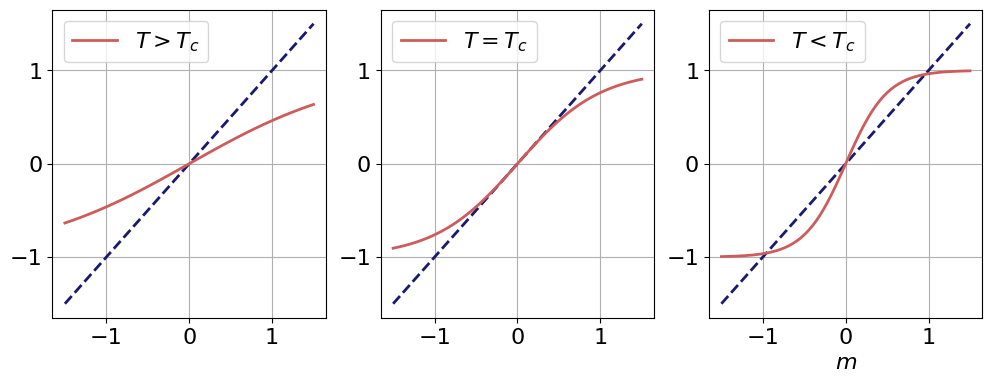

In [4]:
fig = plt.figure(num=None, figsize=(12, 4), dpi=100, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16}); 

Nt=64
m = np.linspace(-1.5, 1.5, Nt)
Tc = 1

plt.subplot(131)
plt.plot(m, m, '--', color='midnightblue', lw=2 )
T = 2;    plt.plot(m, np.tanh(Tc*m/T), '-',color='indianred', lw=2, label='$T>T_c$')
plt.legend();plt.grid();
plt.subplot(132)
plt.plot(m, m, '--', color='midnightblue', lw=2 )
T = 1;    plt.plot(m, np.tanh(Tc*m/T), '-', color='indianred', lw=2, label='$T=T_c$')
plt.legend();plt.grid();
plt.subplot(133)
plt.plot(m, m, '--', color='midnightblue', lw=2 )
T = 0.5;  plt.plot(m, np.tanh(Tc*m/T),'-',color='indianred', lw=2, label='$ T<T_c$')
plt.xlabel('$m$')
plt.legend();plt.grid();

### Positive external magnetic field

$$
m = \tanh \left(m\frac{T_c}{T} + \alpha h\right)
$$

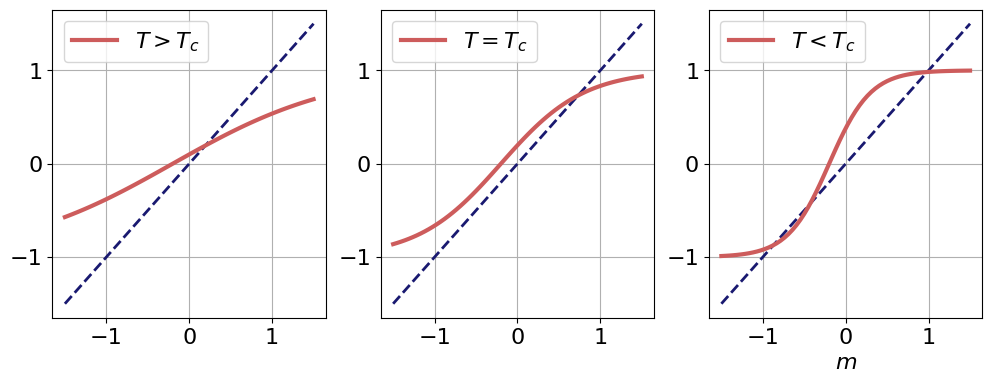

In [5]:
fig = plt.figure(num=None, figsize=(12, 4), dpi=100, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16}); 

Nt=64
m = np.linspace(-1.5, 1.5, Nt)
Tc = 1
h=0.2

plt.subplot(131)
plt.plot(m, m, '--', color='midnightblue', lw=2 )
T = 2;    plt.plot(m, np.tanh(Tc*m/T+h/T), '-',color='indianred', lw=3, label='$T>T_c$')
plt.legend();plt.grid();
plt.subplot(132)
plt.plot(m, m, '--', color='midnightblue', lw=2 )
T = 1;    plt.plot(m, np.tanh(Tc*m/T+h/T), '-', color='indianred', lw=3, label='$T=T_c$')
plt.legend();plt.grid();
plt.subplot(133)
plt.plot(m, m, '--', color='midnightblue', lw=2 )
T = 0.5;  plt.plot(m, np.tanh(Tc*m/T+h/T),'-',color='indianred', lw=3, label='$ T<T_c$')
plt.xlabel('$m$')
plt.legend();plt.grid();

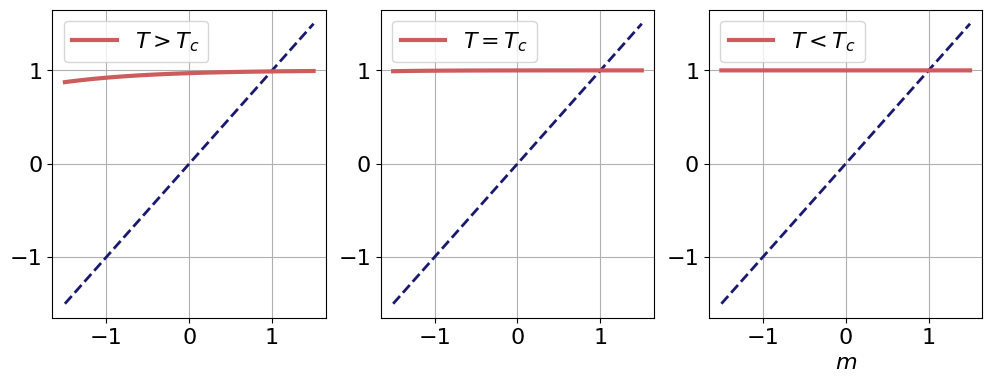

In [6]:
fig = plt.figure(num=None, figsize=(12, 4), dpi=100, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16}); 

Nt=64
m = np.linspace(-1.5, 1.5, Nt)
Tc = 1
h=4.2

plt.subplot(131)
plt.plot(m, m, '--', color='midnightblue', lw=2 )
T = 2;    plt.plot(m, np.tanh(Tc*m/T+h/T), '-',color='indianred', lw=3, label='$T>T_c$')
plt.legend();plt.grid();
plt.subplot(132)
plt.plot(m, m, '--', color='midnightblue', lw=2 )
T = 1;    plt.plot(m, np.tanh(Tc*m/T+h/T), '-', color='indianred', lw=3, label='$T=T_c$')
plt.legend();plt.grid();
plt.subplot(133)
plt.plot(m, m, '--', color='midnightblue', lw=2 )
T = 0.5;  plt.plot(m, np.tanh(Tc*m/T+h/T),'-',color='indianred', lw=3, label='$ T<T_c$')
plt.xlabel('$m$')
plt.legend();plt.grid();

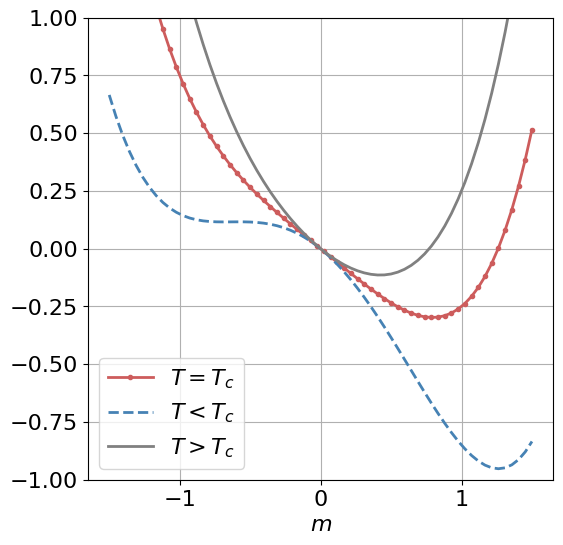

In [7]:
fig = plt.figure(num=None, figsize=(6, 6), dpi=100, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16}); plt.grid()

h=0.5
def freeEnergy(a, b, m):
    return -h*m+0.5*a*m**2 + 0.25*b*m**4

Nt=64
m = np.linspace(-1.5, 1.5, Nt)
b = 1

a = 0;  plt.plot(m, freeEnergy(a, b, m), '.-', color='indianred', lw=2, label='$T=T_c$')
a = -1.2;  plt.plot(m, freeEnergy(a, b, m), '--',color='steelblue', lw=2, label='$T<T_c$')
a = 1;  plt.plot(m, freeEnergy(a, b, m), '-', color='grey', lw=2, label='$T>T_c$')
plt.xlabel(r'$m$'); plt.ylim(-1., 1)
plt.legend();

## Negative extenal field: $h<0$

In the following, we plot the solution for $m$ and the Bragg-William free energy for $h<0$

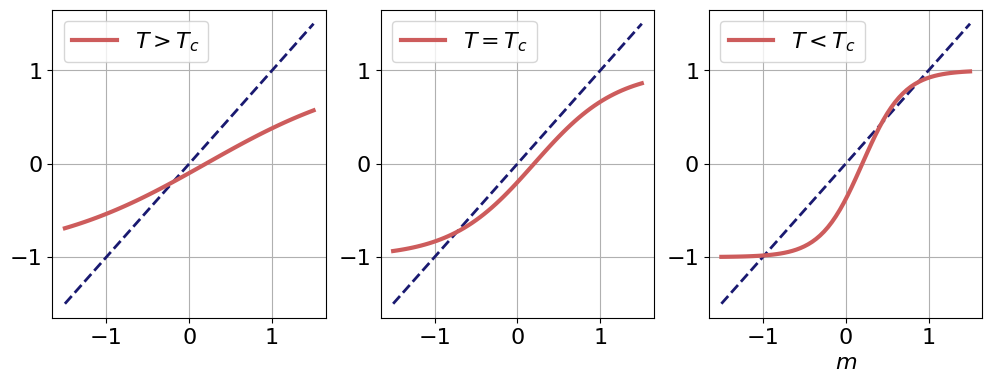

In [8]:
fig = plt.figure(num=None, figsize=(12, 4), dpi=100, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16}); 

Nt=64
m = np.linspace(-1.5, 1.5, Nt)
Tc = 1
h=-0.2

plt.subplot(131)
plt.plot(m, m, '--', color='midnightblue', lw=2 )
T = 2;    plt.plot(m, np.tanh(Tc*m/T+h/T), '-',color='indianred', lw=3, label='$T>T_c$')
plt.legend();plt.grid();
plt.subplot(132)
plt.plot(m, m, '--', color='midnightblue', lw=2 )
T = 1;    plt.plot(m, np.tanh(Tc*m/T+h/T), '-', color='indianred', lw=3, label='$T=T_c$')
plt.legend();plt.grid();
plt.subplot(133)
plt.plot(m, m, '--', color='midnightblue', lw=2 )
T = 0.5;  plt.plot(m, np.tanh(Tc*m/T+h/T),'-',color='indianred', lw=3, label='$ T<T_c$')
plt.xlabel('$m$')
plt.legend();plt.grid();

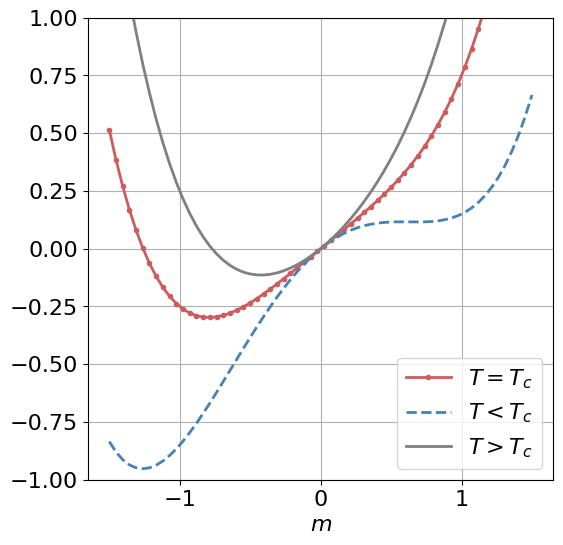

In [9]:
fig = plt.figure(num=None, figsize=(6, 6), dpi=100, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16}); plt.grid()

h=-0.5
def freeEnergy(a, b, m):
    return -h*m+0.5*a*m**2 + 0.25*b*m**4

Nt=64
m = np.linspace(-1.5, 1.5, Nt)
b = 1

a = 0;  plt.plot(m, freeEnergy(a, b, m), '.-', color='indianred', lw=2, label='$T=T_c$')
a = -1.2;  plt.plot(m, freeEnergy(a, b, m), '--',color='steelblue', lw=2, label='$T<T_c$')
a = 1;  plt.plot(m, freeEnergy(a, b, m), '-', color='grey', lw=2, label='$T>T_c$')
plt.xlabel(r'$m$'); plt.ylim(-1., 1)
plt.legend();